# PCA on Heart Disease

### Problem Statement

A pharmaceuticals manufacturing company is conducting a study on a new medicine to treat heart diseases. The company has gathered data from its secondary sources and would like you to provide high level analytical insights on the data. Its aim is to segregate patients depending on their age group and other factors given in the data. Perform PCA and clustering algorithms on the dataset and check if the clusters formed before and after PCA are the same and provide a brief report on your model. You can also explore more ways to improve your model.

Lets load our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Loading our dataset

In [2]:
df = pd.read_csv('heart disease.csv')
df.shape

(303, 14)

Lets explore our dataset

In [3]:
data = df.copy()

We will plot multiple plots so lets set our plot size to (15,20)

In [4]:
plt.rcParams['figure.figsize'] = (15,10)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    165
0    138
Name: target, dtype: int64


<AxesSubplot:>

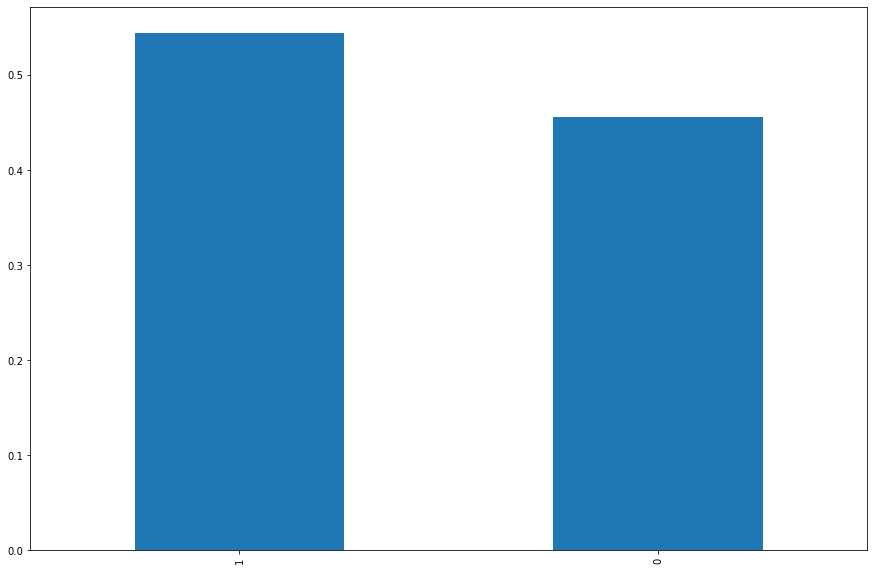

In [9]:
print(df.target.value_counts())
(df.target.value_counts()/df.shape[0]).plot(kind='bar')

<AxesSubplot:>

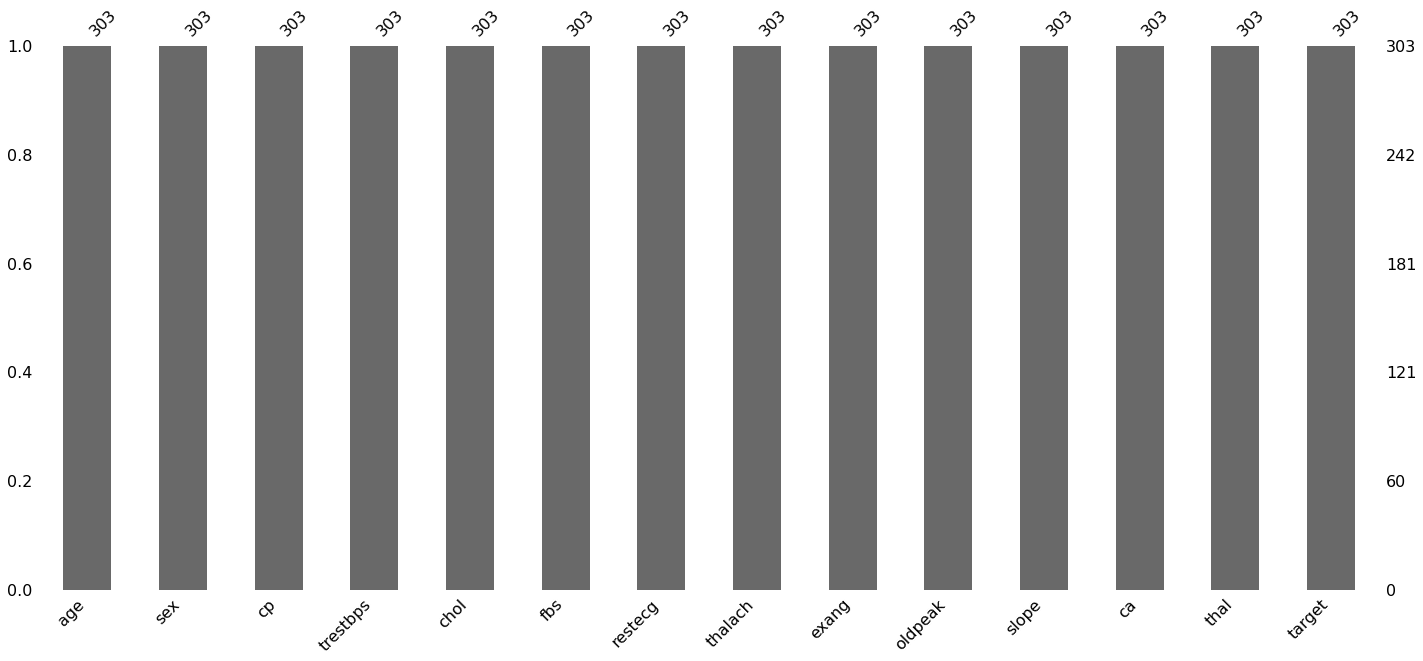

In [10]:
# lets check for any missing value in our data

msno.bar(df)

There are 0 missing values in our dataset

In [11]:
# lets check for data type
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<AxesSubplot:title={'center':'Box Plot of Heart Disease Dataset'}>

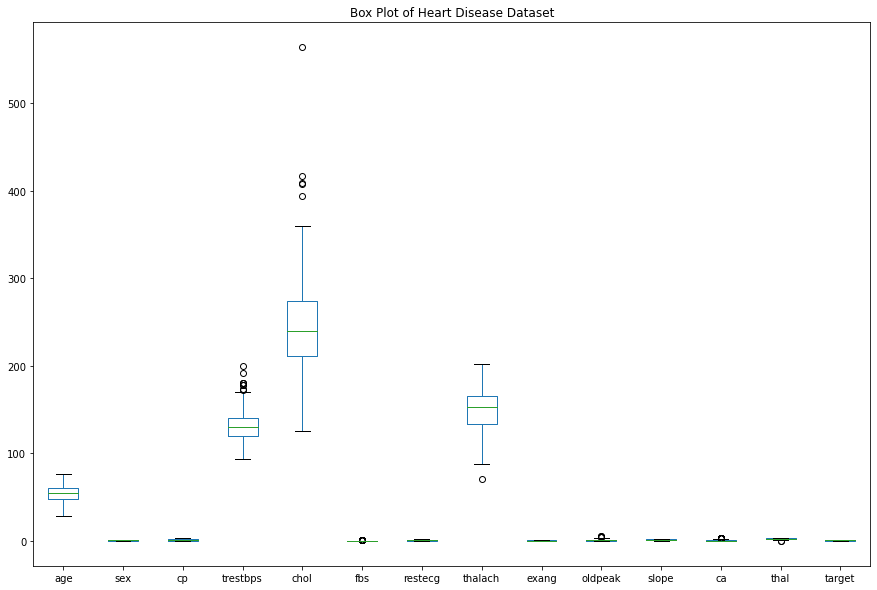

In [12]:
df.plot(kind='box', title='Box Plot of Heart Disease Dataset')

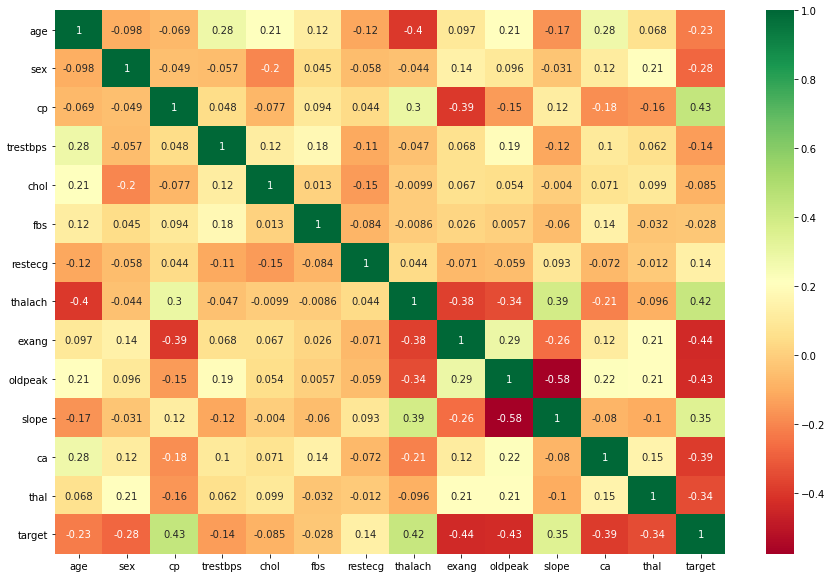

In [15]:
# lets look for correlation between each variable

sns.heatmap(df.corr(), annot =True, cmap = 'RdYlGn'); plt.title ='Corrleation Plot of Heart Disease Dataset'

Lets look at distribution of each variable

<AxesSubplot:ylabel='Density'>

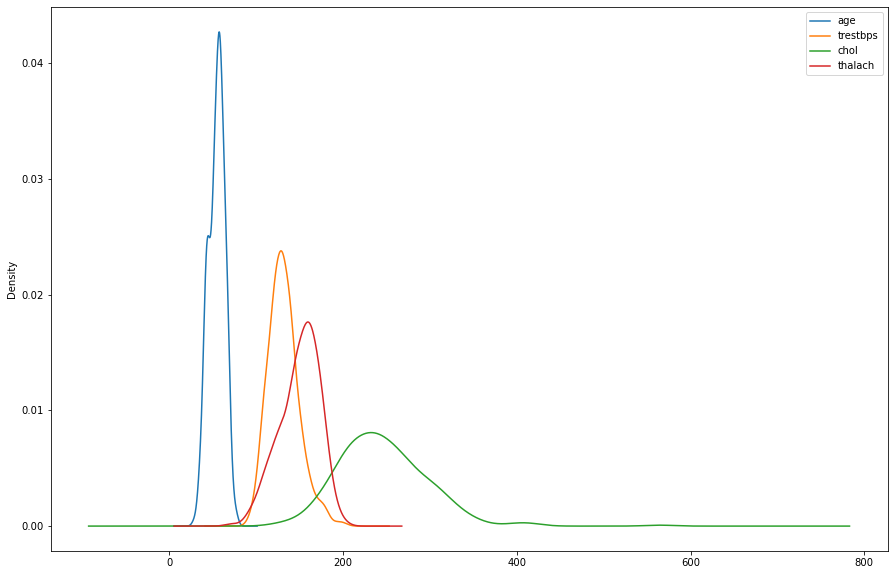

In [20]:
continous = df[['age','trestbps','chol','thalach']]
continous.plot(kind='kde')

Lets look for Outliers in our dataset

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers.sum()

age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64

Now we know that there are many outliers in our dataset, instead of removing these values, lets replace them with their respective IQR value

In [26]:
from feature_engine.outliers import Winsorizer

In [48]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

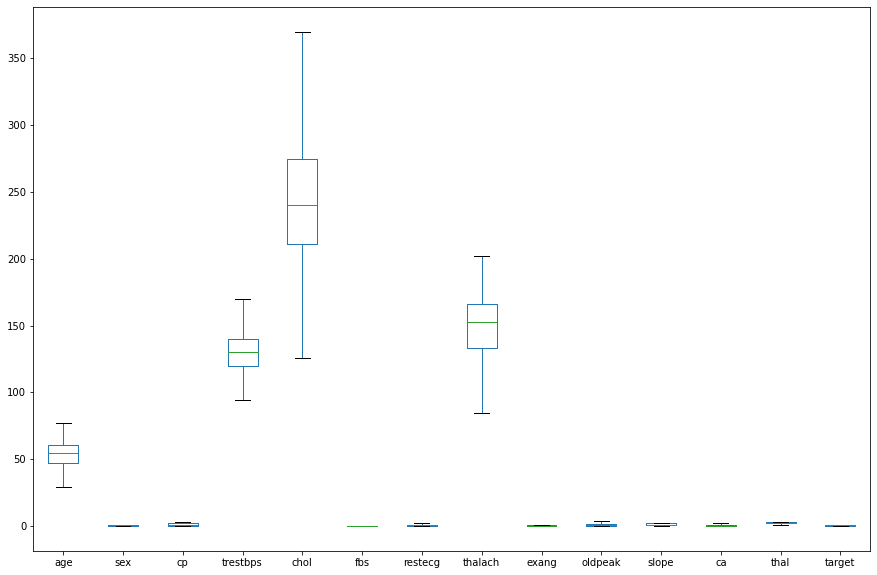

In [49]:
winsor = Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
df_t = winsor.fit_transform(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']])

df_t.plot(kind='box')

From the above plot we can see all the outlier values are now converted to their respective IQR and none on the variable has any outlier

We will now normalise/standardise our dataset so we can start clustering. The reason we are normalizing is to bring all the variable on similar length

def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

df_norm = df_t.copy()
df_norm = norm_func(df_norm)
df_norm.head()

In [43]:
from sklearn import preprocessing

In [57]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = df_t.copy()
df_scaled = min_max_scaler.fit_transform(df_scaled)
new_df = pd.DataFrame(df_scaled,columns=cols)
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.671053,0.438974,0.0,0.0,0.556503,0.0,0.575,0.0,0.0,0.2,1.0
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,0.0,0.0,0.6,1.0
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,1.0,0.0,0.6,1.0
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,1.0,0.0,0.6,1.0
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,1.0,0.0,0.6,1.0


<AxesSubplot:ylabel='Frequency'>

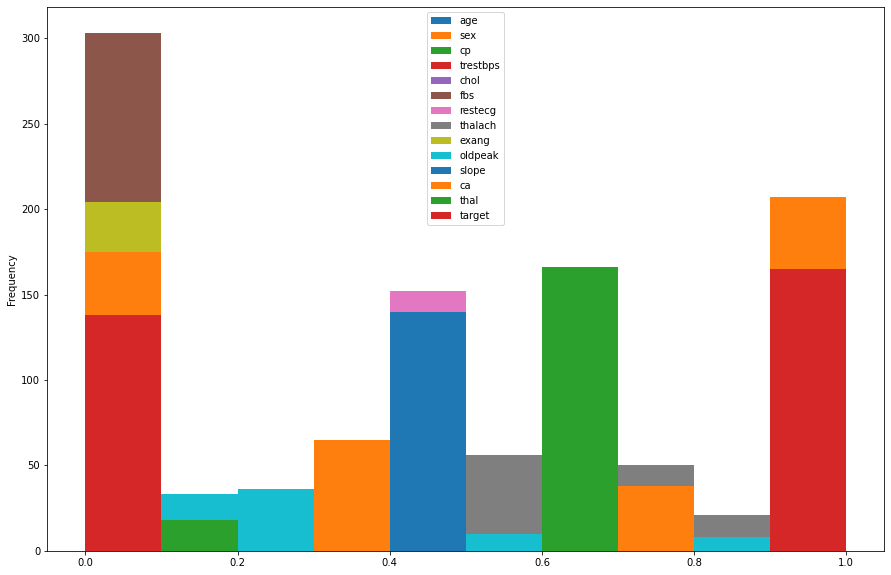

In [62]:
new_df.plot(kind='hist')

# Lets Cluster our new dataset using H-Clustering

In [67]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

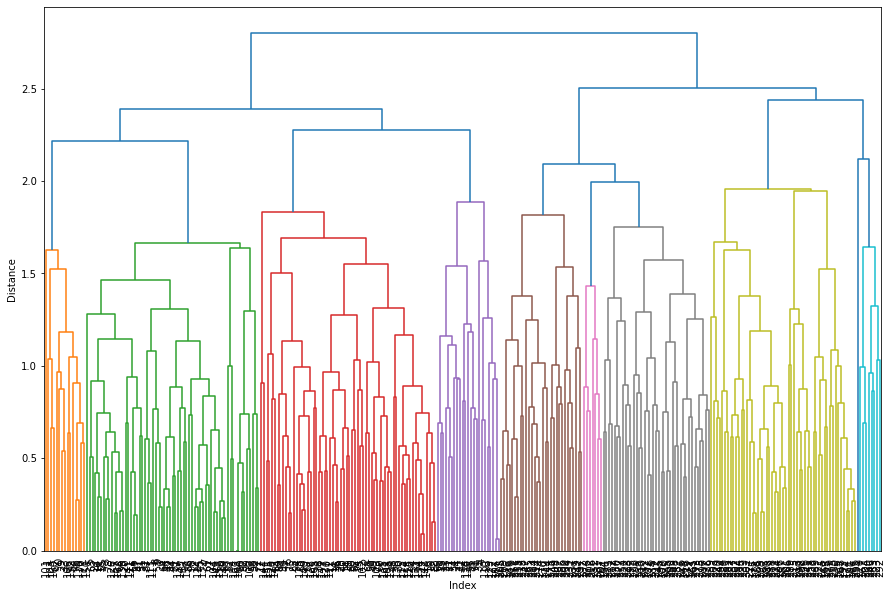

In [68]:
z_comp = linkage(new_df, method = 'complete', metric='euclidean')
#plt.title("H-Clustering Dendogram using Complete Method on Normalized Data")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z_comp, leaf_rotation=90,
             leaf_font_size=10)
plt.show()

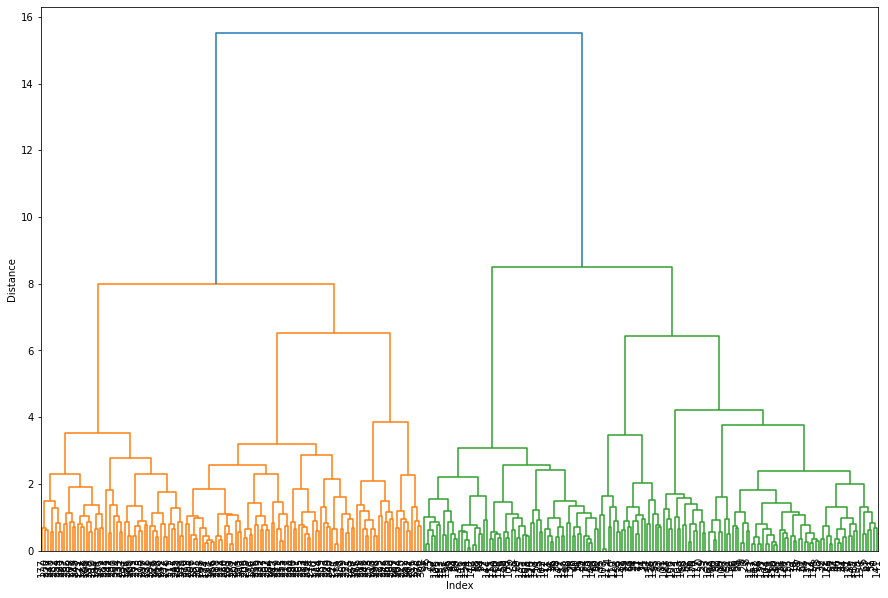

In [69]:
z_ward = linkage(new_df, method = 'ward', metric='euclidean')
#plt.title("H-Clustering Dendogram using Complete Method on Normalized Data")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=90,
             leaf_font_size=10)
plt.show()

In [70]:
h_comp = AgglomerativeClustering(n_clusters=7, linkage='complete', affinity='euclidean').fit(new_df)
h_comp.labels_


array([6, 6, 5, 3, 4, 3, 5, 3, 3, 3, 3, 5, 3, 4, 5, 5, 5, 5, 3, 5, 3, 4,
       3, 4, 4, 5, 3, 3, 5, 6, 5, 3, 3, 6, 4, 4, 5, 3, 5, 5, 5, 3, 4, 5,
       3, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 3, 5, 5, 3, 6, 3, 3, 5,
       4, 5, 3, 5, 6, 4, 3, 4, 5, 5, 6, 4, 3, 4, 3, 3, 5, 6, 5, 5, 3, 3,
       5, 5, 3, 4, 3, 4, 5, 4, 5, 3, 3, 3, 3, 6, 5, 6, 3, 5, 6, 4, 5, 5,
       4, 3, 5, 3, 3, 5, 6, 6, 5, 4, 5, 3, 4, 5, 5, 5, 3, 5, 5, 4, 5, 5,
       3, 3, 5, 5, 5, 3, 4, 4, 5, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 5, 6, 5,
       5, 5, 3, 3, 3, 3, 6, 5, 3, 3, 3, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2,

In [71]:
cluster_labels = pd.Series(h_comp.labels_)
cluster_data = df.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,5
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


In [72]:
cluster_data = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()

In [73]:
cluster_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,
0,60.444444,0.111111,0.000000,150.444444,286.222222,0.333333,0.444444,151.333333,0.555556,3.300000,0.555556,2.333333,2.333333,0.0
1,55.528302,0.830189,0.169811,135.358491,251.981132,0.094340,0.547170,130.169811,1.000000,2.128302,0.962264,0.792453,2.716981,0.0
2,56.894737,0.907895,0.750000,131.828947,246.302632,0.184211,0.381579,143.881579,0.236842,1.003947,1.381579,1.289474,2.447368,0.0
3,49.603175,1.000000,1.190476,129.730159,230.936508,0.158730,0.682540,164.904762,0.000000,0.360317,1.873016,0.523810,2.174603,1.0
4,53.608696,0.652174,1.130435,127.478261,240.652174,0.086957,0.478261,150.217391,1.000000,0.647826,1.521739,0.217391,2.217391,1.0
5,54.703125,0.000000,1.406250,127.921875,255.093750,0.078125,0.625000,154.015625,0.000000,0.585938,1.593750,0.312500,2.000000,1.0
6,53.533333,1.000000,2.400000,136.200000,237.200000,0.400000,0.266667,163.066667,0.000000,1.406667,0.533333,0.133333,2.266667,1.0


In [74]:
h_ward = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean').fit(new_df)
h_ward.labels_

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0,
       3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3,

In [75]:
cluster_labels1 = pd.Series(h_ward.labels_)
cluster_data1 = df.copy()
cluster_data1['clust'] = cluster_labels1
cluster_data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [76]:
cluster_data1 = cluster_data1.iloc[:,:-1].groupby(cluster_data1['clust']).mean()
cluster_data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,
0,56.813953,0.720930,0.186047,135.825581,257.000000,0.186047,0.441860,134.383721,0.883721,1.813953,1.058140,1.209302,2.569767,0.0
1,51.099010,0.920792,1.356436,130.178218,234.079208,0.178218,0.574257,161.287129,0.227723,0.581188,1.594059,0.396040,2.198020,1.0
2,54.703125,0.000000,1.406250,127.921875,255.093750,0.078125,0.625000,154.015625,0.000000,0.585938,1.593750,0.312500,2.000000,1.0
3,56.250000,1.000000,0.961538,132.038462,241.307692,0.115385,0.461538,146.903846,0.000000,1.207692,1.346154,1.096154,2.500000,0.0


# Lets Use K-Means Clustering and see the clusters

In [77]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.671053,0.438974,0.0,0.0,0.556503,0.0,0.575,0.0,0.0,0.2,1.0
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,0.0,0.0,0.6,1.0
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,1.0,0.0,0.6,1.0
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,1.0,0.0,0.6,1.0
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,1.0,0.0,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.605263,0.471795,0.0,0.5,0.326226,1.0,0.050,0.5,0.0,1.0,0.0
299,0.333333,1.0,1.000000,0.210526,0.566154,0.0,0.5,0.402985,0.0,0.300,0.5,0.0,1.0,0.0
300,0.812500,1.0,0.000000,0.657895,0.274872,0.0,0.5,0.479744,0.0,0.850,0.5,0.8,1.0,0.0
301,0.583333,1.0,0.000000,0.473684,0.020513,0.0,0.5,0.257996,1.0,0.300,0.5,0.4,1.0,0.0


In [78]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

TypeError: 'str' object is not callable

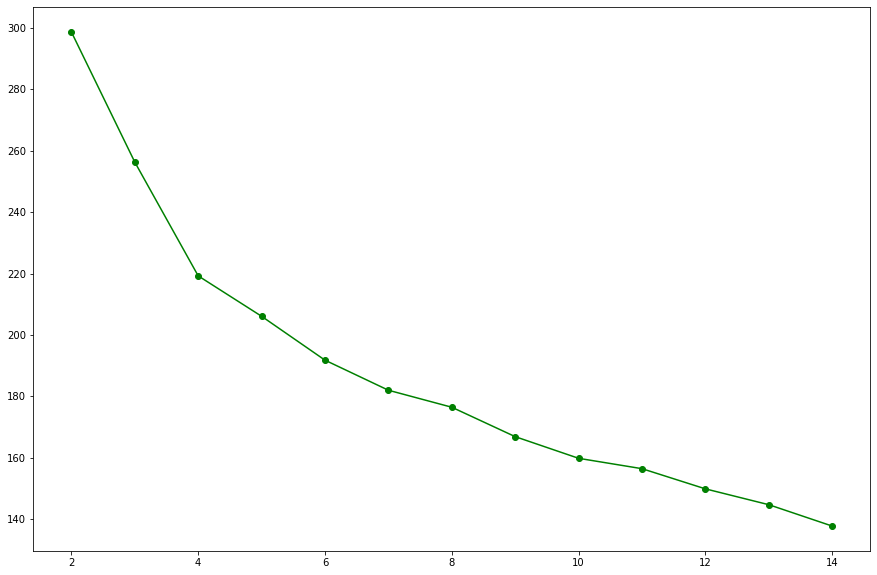

In [79]:
TWSS = []
k=list(range(2,15))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_df)
    TWSS.append(kmeans.inertia_)
plt.plot(k,TWSS, 'go-')
plt.title("K-Means Clustering - ELBOW Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Total Within SS')

In [80]:
kl = KneeLocator(range(2,15), TWSS, curve='convex', direction='decreasing')
kl.elbow

6

In [81]:
# Lets use 6 Clusters
model1 = KMeans(n_clusters=6)
model1.fit(new_df)
model1.labels_
cluster_labels = pd.Series(model1.labels_)
cluster_data2 = df.copy()
cluster_data2['Clust'] = cluster_labels
cluster_data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [82]:
cluster3 = cluster_data2.iloc[:,:-1].groupby(cluster_data2.Clust).mean()
cluster3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Clust,,,,,,,,,,,,,,
0,56.250000,1.000000,0.961538,132.038462,241.307692,0.115385,0.461538,146.903846,0.000000,1.207692,1.346154,1.096154,2.500000,0.0
1,53.608696,0.652174,1.130435,127.478261,240.652174,0.086957,0.478261,150.217391,1.000000,0.647826,1.521739,0.217391,2.217391,1.0
2,50.358974,1.000000,1.423077,130.974359,232.141026,0.205128,0.602564,164.551282,0.000000,0.561538,1.615385,0.448718,2.192308,1.0
3,55.951613,1.000000,0.193548,131.838710,250.048387,0.161290,0.403226,131.274194,1.000000,1.803226,1.096774,1.177419,2.596774,0.0
4,54.703125,0.000000,1.406250,127.921875,255.093750,0.078125,0.625000,154.015625,0.000000,0.585938,1.593750,0.312500,2.000000,1.0
5,59.041667,0.000000,0.166667,146.125000,274.958333,0.250000,0.541667,142.416667,0.583333,1.841667,0.958333,1.291667,2.500000,0.0


## Lets Apply PCA on the data

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [84]:
df_pca = new_df.copy()

In [85]:
pca = PCA(n_components=8)
pca_values = pca.fit_transform(df_pca)

In [86]:
var = pca.explained_variance_ratio_
var

array([0.34275037, 0.14992031, 0.11112492, 0.08234821, 0.06314073,
       0.05153878, 0.0485026 , 0.03608228])

In [87]:
pca.components_

array([[ 6.84723148e-02,  2.72866360e-01, -2.74299621e-01,
         4.18265162e-02,  2.65578190e-02, -0.00000000e+00,
        -6.08213519e-02, -1.47126451e-01,  4.84488437e-01,
         2.19594407e-01, -1.99611002e-01,  2.47607083e-01,
         1.38995713e-01, -6.43731798e-01],
       [ 9.76560457e-02, -9.15572555e-01, -1.72701132e-01,
         5.85680698e-02,  1.14844128e-01,  5.55111512e-17,
        -1.60217120e-03, -9.33662400e-02,  2.56912248e-01,
         8.52112263e-02, -1.39740658e-01,  2.73933959e-02,
        -5.81014797e-02, -1.03349327e-02],
       [ 1.47628750e-01, -1.53616449e-01,  1.09057666e-01,
         1.02369706e-01,  5.13398494e-02, -1.11022302e-16,
        -6.80910350e-02, -1.35460526e-02, -7.22291022e-01,
         1.23754797e-01, -6.90538313e-02,  5.04386298e-01,
         2.81556985e-02, -3.57480993e-01],
       [ 4.10825289e-02,  4.98328577e-02,  4.89968276e-01,
         1.32791502e-01, -5.48744433e-02, -1.66533454e-16,
        -5.17387916e-02, -8.63269040e-02, -1.

In [88]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([34.28, 49.27, 60.38, 68.61, 74.92, 80.07, 84.92, 88.53])

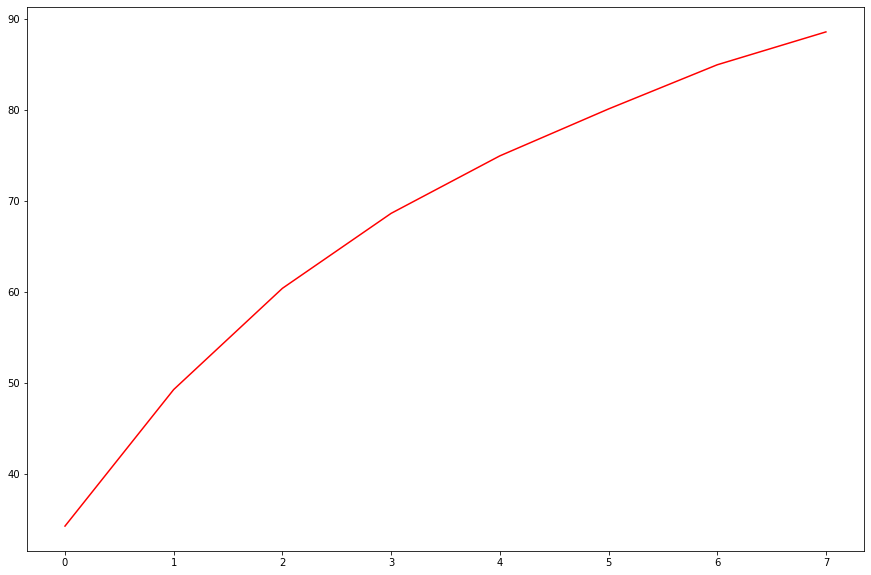

In [89]:
plt.plot(var1, color='red')

In [92]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5", "comp6","comp7"
final = pd.concat([df_pca, pca_data.iloc[:, 0:]], axis = 1)

In [93]:
final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7
0,0.708333,1.0,1.000000,0.671053,0.438974,0.0,0.0,0.556503,0.0,0.575,...,0.2,1.0,-0.446741,-0.324976,0.096284,1.120949,0.201351,-0.069041,-0.401560,0.313674
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,...,0.6,1.0,-0.354162,-0.351797,-0.026589,0.981309,-0.156375,0.442839,-0.156771,-0.094983
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,...,0.6,1.0,-0.800566,0.436076,-0.004958,-0.067601,-0.142748,-0.197414,-0.135478,-0.007741
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,...,0.6,1.0,-0.579198,-0.459969,-0.172472,-0.127393,-0.120380,0.186954,-0.014421,-0.051165
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,...,0.6,1.0,-0.254017,0.835398,-0.754025,-0.394523,0.094128,0.073777,0.050454,-0.139328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.605263,0.471795,0.0,0.5,0.326226,1.0,0.050,...,1.0,0.0,0.572047,0.877866,-0.355370,-0.099235,-0.319807,-0.075742,0.438230,-0.030269
299,0.333333,1.0,1.000000,0.210526,0.566154,0.0,0.5,0.402985,0.0,0.300,...,1.0,0.0,0.098608,-0.489881,0.279789,0.495383,-0.257029,-0.087034,0.675131,0.119070
300,0.812500,1.0,0.000000,0.657895,0.274872,0.0,0.5,0.479744,0.0,0.850,...,1.0,0.0,0.724262,-0.216022,0.742847,0.095430,-0.131539,0.456042,-0.032913,-0.275501
301,0.583333,1.0,0.000000,0.473684,0.020513,0.0,0.5,0.257996,1.0,0.300,...,1.0,0.0,0.991404,-0.058610,-0.312008,-0.046688,-0.070941,0.305068,0.182359,0.061708


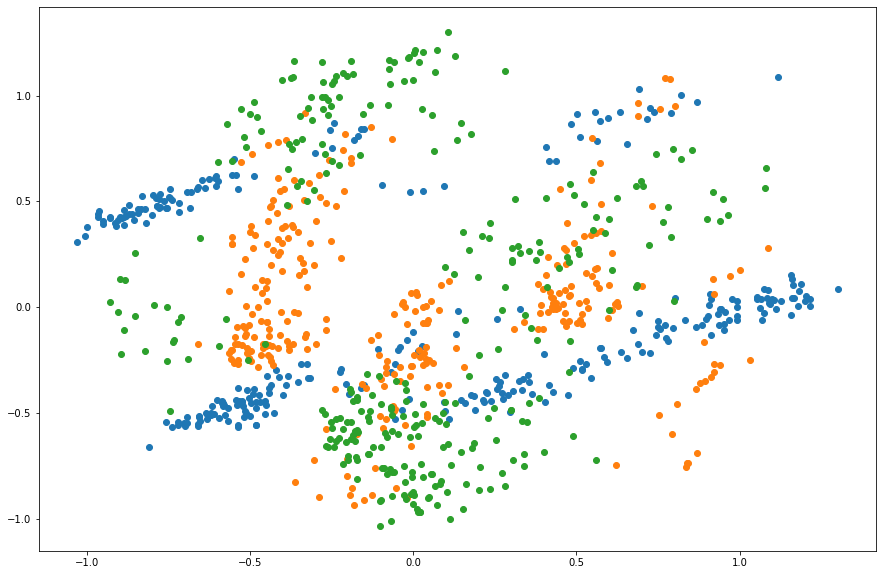

In [94]:
plt.scatter(x = final.comp0, y = final.comp1)
plt.scatter(x = final.comp1, y = final.comp2)
plt.scatter(x = final.comp2, y = final.comp0)

In [96]:
pca_data1 = pca_data[['comp0','comp1','comp2','comp3','comp4','comp5']]
pca_data1

,comp0,comp1,comp2,comp3,comp4,comp5
0,-0.446741,-0.324976,0.096284,1.120949,0.201351,-0.069041
1,-0.354162,-0.351797,-0.026589,0.981309,-0.156375,0.442839
2,-0.800566,0.436076,-0.004958,-0.067601,-0.142748,-0.197414
3,-0.579198,-0.459969,-0.172472,-0.127393,-0.120380,0.186954
4,-0.254017,0.835398,-0.754025,-0.394523,0.094128,0.073777
...,...,...,...,...,...,...
298,0.572047,0.877866,-0.355370,-0.099235,-0.319807,-0.075742
299,0.098608,-0.489881,0.279789,0.495383,-0.257029,-0.087034
300,0.724262,-0.216022,0.742847,0.095430,-0.131539,0.456042
301,0.991404,-0.058610,-0.312008,-0.046688,-0.070941,0.305068


With 6 Columns we are getting around 80% of the information

Lets Apply H-Clustering and KMeans on pca_data1

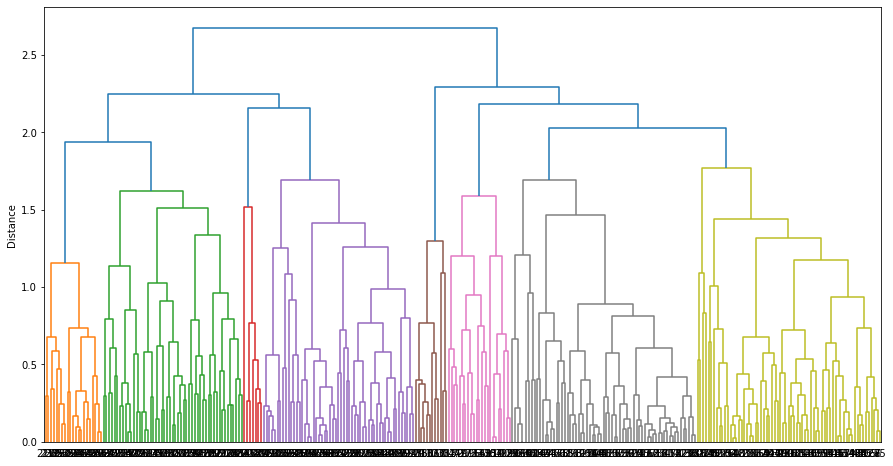

In [98]:
z_comp = linkage(pca_data1, method = 'complete', metric = 'euclidean')
plt.figure(figsize= (15,8));#plt.title("Hierarchical Clustering Dendogram using Complete Method on 3 Principels");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_comp, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

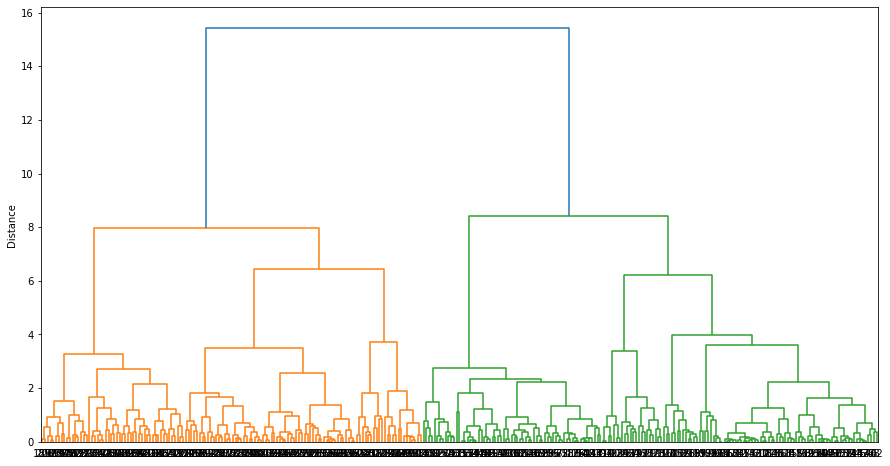

In [100]:
z_ward = linkage(pca_data1, method = 'ward', metric = 'euclidean')
plt.figure(figsize= (15,8));#plt.title("Hierarchical Clustering Dendogram using Ward Method on 3 Principels");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

In [101]:
h_ward1 = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean').fit(pca_data1)
h_ward1.labels_

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0,
       3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3,

In [102]:
cluster_labels = pd.Series(h_ward1.labels_)
cluster_data = df.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [103]:
cluster_data2 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,
0,56.813953,0.72093,0.186047,135.825581,257.000000,0.186047,0.441860,134.383721,0.883721,1.813953,1.058140,1.209302,2.569767,0.0
1,51.150000,0.93000,1.350000,130.060000,234.650000,0.180000,0.580000,161.300000,0.220000,0.573000,1.610000,0.400000,2.200000,1.0
2,54.569231,0.00000,1.415385,128.138462,253.892308,0.076923,0.615385,154.107692,0.015385,0.598462,1.569231,0.307692,2.000000,1.0
3,56.250000,1.00000,0.961538,132.038462,241.307692,0.115385,0.461538,146.903846,0.000000,1.207692,1.346154,1.096154,2.500000,0.0


In [104]:
h_comp1 = AgglomerativeClustering(n_clusters=8, linkage='complete', affinity='euclidean').fit(pca_data1)
h_comp1.labels_

array([5, 5, 0, 2, 4, 2, 0, 2, 2, 2, 2, 0, 2, 4, 0, 0, 0, 5, 2, 0, 2, 4,
       2, 4, 4, 0, 2, 2, 0, 5, 0, 2, 2, 5, 4, 4, 0, 2, 0, 0, 0, 2, 4, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       4, 0, 2, 0, 2, 4, 2, 4, 0, 0, 5, 4, 2, 4, 2, 2, 0, 5, 0, 0, 2, 2,
       0, 0, 2, 4, 2, 4, 0, 4, 0, 2, 2, 2, 2, 5, 0, 5, 2, 0, 2, 4, 0, 0,
       4, 2, 0, 2, 2, 0, 5, 5, 0, 4, 0, 2, 4, 0, 0, 0, 2, 0, 0, 4, 0, 0,
       2, 2, 0, 0, 0, 2, 4, 4, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 5, 0, 2, 2, 2, 1, 1, 6, 3, 1, 1, 3, 3, 3, 1, 1,
       7, 3, 1, 7, 1, 6, 0, 3, 3, 3, 7, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3,
       1, 3, 3, 1, 7, 1, 6, 7, 7, 6, 3, 7, 3, 1, 3, 1, 7, 1, 0, 7, 3, 7,
       6, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 7, 1, 3, 7, 3, 3, 7, 7, 1, 1,
       3, 1, 1, 3, 1, 1, 3, 3, 1, 7, 6, 7, 3, 7, 1, 1, 1, 1, 1, 3, 1, 1,
       7, 7, 1, 3, 1, 1, 3, 3, 3, 3, 7, 3, 3, 3, 0, 1, 1, 1, 3, 3, 7, 1,
       3, 3, 1, 1, 3, 6, 1, 3, 1, 1, 1, 3, 1, 3, 3,

In [105]:
cluster_labels = pd.Series(h_comp1.labels_)
cluster_data = df.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,5
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,5
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


In [106]:
cluster_data2 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,
0,54.820896,0.000000,1.358209,127.805970,257.432836,0.089552,0.597015,154.253731,0.0,0.538806,1.611940,0.358209,2.014925,0.940299
1,56.381818,0.745455,0.218182,137.454545,252.254545,0.163636,0.563636,130.254545,1.0,2.194545,0.872727,0.981818,2.563636,0.000000
2,50.208955,1.000000,1.283582,130.462687,230.656716,0.164179,0.641791,164.358209,0.0,0.355224,1.820896,0.507463,2.179104,1.000000
3,56.215686,1.000000,0.980392,132.392157,239.803922,0.117647,0.431373,147.039216,0.0,1.145098,1.372549,1.058824,2.529412,0.000000
4,53.608696,0.652174,1.130435,127.478261,240.652174,0.086957,0.478261,150.217391,1.0,0.647826,1.521739,0.217391,2.217391,1.000000
5,52.500000,0.916667,2.333333,135.416667,239.916667,0.416667,0.416667,161.416667,0.0,1.883333,0.333333,0.083333,2.250000,1.000000
6,61.714286,0.142857,0.000000,143.142857,276.285714,0.142857,0.428571,139.428571,0.0,3.385714,0.571429,2.714286,2.428571,0.000000
7,55.857143,1.000000,0.000000,128.904762,260.190476,0.238095,0.238095,141.190476,1.0,0.704762,1.571429,1.428571,2.619048,0.000000


## Lets Cluster using K-Means

Text(0, 0.5, 'Total Within SS')

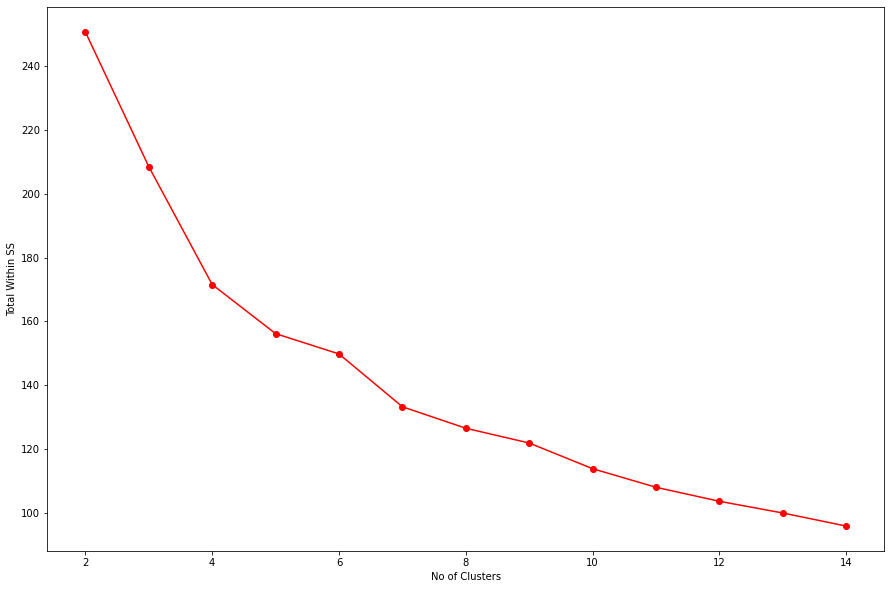

In [107]:
TWSS = []
k=list(range(2,15))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS, 'ro-');plt.xlabel("No of Clusters");plt.ylabel('Total Within SS')

In [108]:
kl = KneeLocator(range(2,15), TWSS, curve='convex', direction='decreasing')
kl.elbow

7

In [109]:
model2 = KMeans(n_clusters=7)
model2.fit(pca_data)
model2.labels_
cluster_labels = pd.Series(model2.labels_)
cluster_data2 = df.copy()
cluster_data2['Clust'] = cluster_labels
cluster_data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,6


In [110]:
cluster4 = cluster_data2.iloc[:,:-1].groupby(cluster_data2.Clust).mean()
cluster4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Clust,,,,,,,,,,,,,,
0,56.250000,1.000000,0.961538,132.038462,241.307692,0.115385,0.461538,146.903846,0.000000,1.207692,1.346154,1.096154,2.500000,0.0
1,52.461538,1.000000,0.346154,133.038462,236.769231,0.230769,0.346154,130.846154,1.000000,1.915385,0.846154,0.307692,2.307692,0.0
2,54.703125,0.000000,1.406250,127.921875,255.093750,0.078125,0.625000,154.015625,0.000000,0.585938,1.593750,0.312500,2.000000,1.0
3,50.358974,1.000000,1.423077,130.974359,232.141026,0.205128,0.602564,164.551282,0.000000,0.561538,1.615385,0.448718,2.192308,1.0
4,59.041667,0.000000,0.166667,146.125000,274.958333,0.250000,0.541667,142.416667,0.583333,1.841667,0.958333,1.291667,2.500000,0.0
5,58.472222,1.000000,0.083333,130.972222,259.638889,0.111111,0.444444,131.583333,1.000000,1.722222,1.277778,1.805556,2.805556,0.0
6,53.608696,0.652174,1.130435,127.478261,240.652174,0.086957,0.478261,150.217391,1.000000,0.647826,1.521739,0.217391,2.217391,1.0


In [111]:
model2 = KMeans(n_clusters=6)
model2.fit(pca_data)
model2.labels_
cluster_labels = pd.Series(model2.labels_)
cluster_data2 = df.copy()
cluster_data2['Clust'] = cluster_labels
cluster_data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Clust
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,4
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,5
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [112]:
cluster5 = cluster_data2.iloc[:,:-1].groupby(cluster_data2.Clust).mean()
cluster5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Clust,,,,,,,,,,,,,,
0,53.608696,0.652174,1.130435,127.478261,240.652174,0.086957,0.478261,150.217391,1.000000,0.647826,1.521739,0.217391,2.217391,1.0
1,56.250000,1.000000,0.961538,132.038462,241.307692,0.115385,0.461538,146.903846,0.000000,1.207692,1.346154,1.096154,2.500000,0.0
2,55.951613,1.000000,0.193548,131.838710,250.048387,0.161290,0.403226,131.274194,1.000000,1.803226,1.096774,1.177419,2.596774,0.0
3,59.041667,0.000000,0.166667,146.125000,274.958333,0.250000,0.541667,142.416667,0.583333,1.841667,0.958333,1.291667,2.500000,0.0
4,50.358974,1.000000,1.423077,130.974359,232.141026,0.205128,0.602564,164.551282,0.000000,0.561538,1.615385,0.448718,2.192308,1.0
5,54.703125,0.000000,1.406250,127.921875,255.093750,0.078125,0.625000,154.015625,0.000000,0.585938,1.593750,0.312500,2.000000,1.0
